- title: Занятие 11
- author: Vitalii Zavadskyi
- date: 2025-11-14
- slug: 2025_lpr_lab11
- ipynb_url: download/2025_lpr_lab11.ipynb

# Лабораторное занятие 11

## Введение в "машинное обучение"

Машинное обучение (ML) — это наука, изучающая алгоритмы, автоматически улучшающиеся благодаря опыту. © Яндекс.Образование

Основная задача ML: подобрать алгоритм (модель), которая решала бы соотвествующую задачу на определенном наборе данных. Часто набор данных ограничен и не содержит всех возможных вариаций, но в этом и состоит "магия" машинного обучения — иметь возможность ответить на поставленный вопрос почти для любого набора данных при настройке алгоритма на ограниченных данных

Среди задач ML можно выделить следующие (первые две мы рассмотрим в данной лабораторной работе):
- Задачи регрессии (определение числового параметра по совокупности характеристик объекта)
- Задачи классификации (определение принадлежности объекта к опрределенному классу)
- Задача класстеризации (разбиение выборки на непересекающиеся группы)
- Задача поиска аномалий
- и т.д.

Задачей регрессии может быть предсказание цены на недвижимость при наличии информации о расположении недвижимости, доступности транспорта и т.д.

Задача классификации — определение наличия болезни у пациента по его физическим параметрам.

Для обучения алгоритмов используется несколько основных подходов:
- Обучение с учителем/supervised learning (предоставляется набор размеченных данных)
- Обучение без учителя/unsupervised learning (набор данных не содержит информации о классах, целевых значениях)
- Обучение с подкреплением/reinforcement learning (алгоритм обучается на данных за "награду")

В этой лабораторной работе мы познакомимся с ML на языке Python с помощью библиотеки scikit-learn `sklearn`.

Библиотека scikit-learn содержит множество моделей. На этом семинаре мы познакомимся с моделями для обучения с учителем: `KNeighborsClassifier` и `DecisionTreeClassifier`.

Выполните ячейку ниже для установки библиотеки scikit-learn.

In [3]:
%pip install scikit-learn

Еще нам сегодня понадобится библиотека для красивой отрисовки и получения части данных: seaborn.

In [4]:
%pip install seaborn

## Метод k-ближайших соседей

Рассмотрим модель k-ближайших соседей (k-nearest neighbors kNN). Интуитивное понимание модели — для выбранного набора данных можно вычислить расстояние между точками. Принадлежность точки к определенному классу определяется "голосованием" k ближайших соседей. Чаще всего k нечетное (*почему же?*)

Анимация для объяснения метода kNN: [ссылка](https://machinelearningknowledge.ai/wp-content/uploads/2021/07/Sklearn-KNN-Classifier.gif)

Здесь оставим наглядную картинку

![image]( 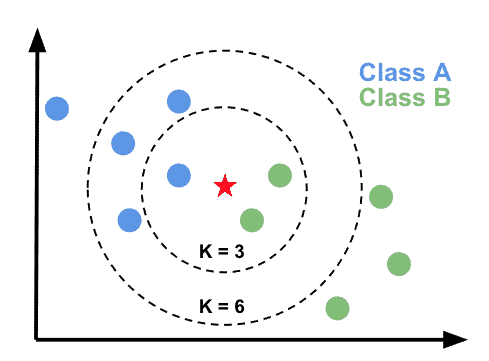)

Расстояние между точками признаков можно считать различными способами: как в евклидовом пространстве, так и косинусоидальной метрикой. Выбор метрики зависит от решаемой задачи.

Метод kNN можно использовать для решения задач регрессии и классфификации. На текущий момент рассмотрим ее использование для задачи бинарной (всего два возможных состояния) классфикации на примере искуственных данных.

Сгенерируем пары точек на двумерной плоскости.

In [5]:
import numpy as np


np.random.seed(1)
n_samples = 1000

X = np.random.rand(n_samples, 2) * 2.5 - 1.25

Определим такие точки, которые лежат внутри окружности радиуса 1.

In [6]:
y = (X**2).sum(axis=1) < 1

Принадлежность точек внутренности окружности радиуса 1 будем считать за принадлежность к некоторому нулевому классу.

Утверждение выше можем сформулировать иначе: нулевая гипотеза нашей модели утверждает, что точка находится внутри окружности радиуса 1, а центр окружности совпадает с центром системы координат. Альтернатива гипотезе - отсутствие точки внутри окружности радиуса 1 с центром в центре системы координат.

Изобразим получившиеся данные.

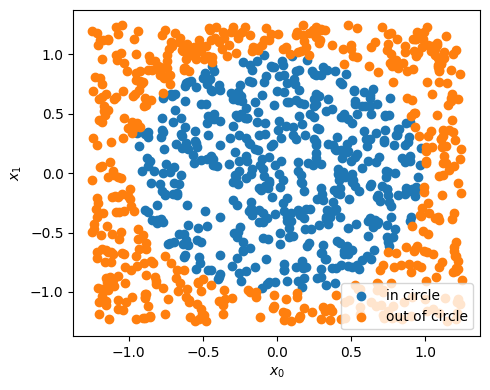

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4))
plt.scatter(X[y, 0], X[y, 1], label="in circle")
plt.scatter(X[~y, 0], X[~y, 1], label="out of circle")
plt.legend()
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Составим из наборов точек и меток таблицу.

In [8]:
import pandas as pd

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "target"])

df.head()

,x0,x1,target
0,-0.207445,0.550811,1.0
1,-1.249714,-0.494169,0.0
2,-0.883110,-1.019154,0.0
3,-0.784349,-0.386098,1.0
4,-0.258081,0.097042,1.0


Каждая строка данных описывается 2 признаками. Каждой строке данных из переменной `X` соответствует свое значение из `y`.

Попробуем нарисовать распределения признаков.

<details>
<summary>Замечание по коду в ячейке ниже</summary>

Внимательный читатель мог заметить, что ниже в ячейке кода используется `;` в последней строке кода. Это делается для подавления ненужного вывода в ячейку. Убедиться в этом легко, попробуйте убрать `;` и сравните "до" и "после".

</details>


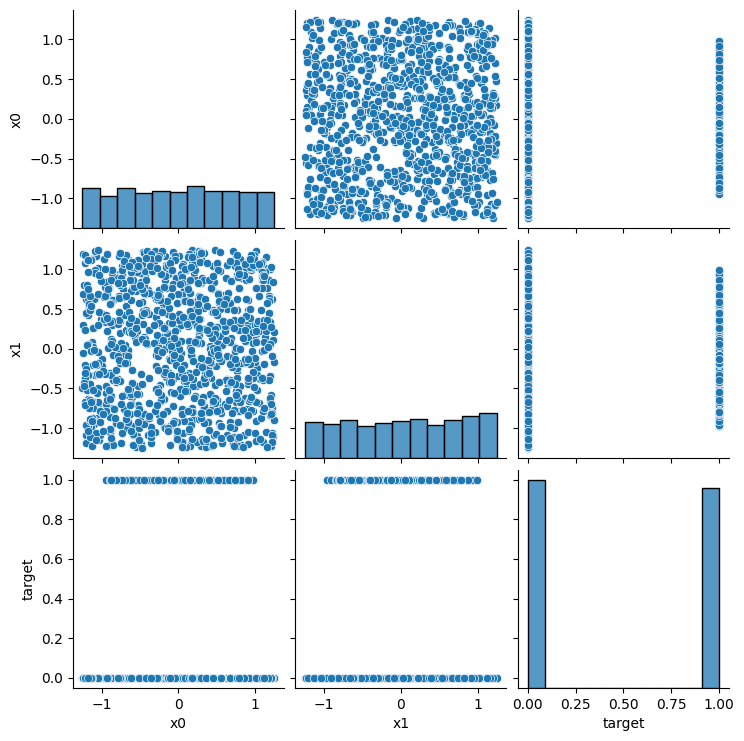

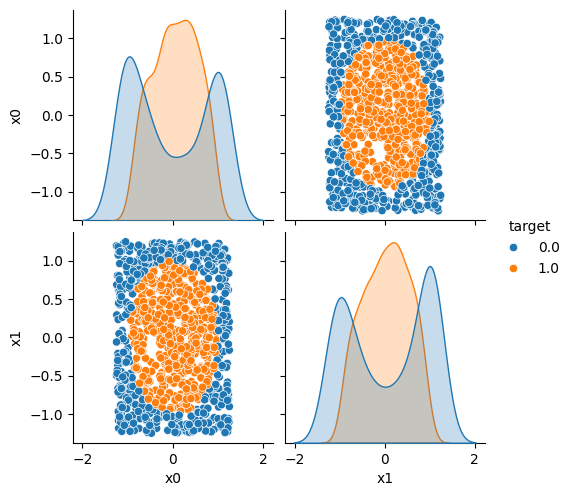

In [9]:
import seaborn as sns

sns.pairplot(df)
sns.pairplot(df, hue="target");

По  распредеелниям можно точно утверждать, что выборка является сбалансрованной (одинаковое количество точек внутри окружности радиуса 1 и вне этой окружности). Координаты точек в окружности скорее всего будут распределены более плотно вокруг координат 0 (обратите внимание на гистограммы во второй группе графиков)

Построим коррреляционную матрицу:

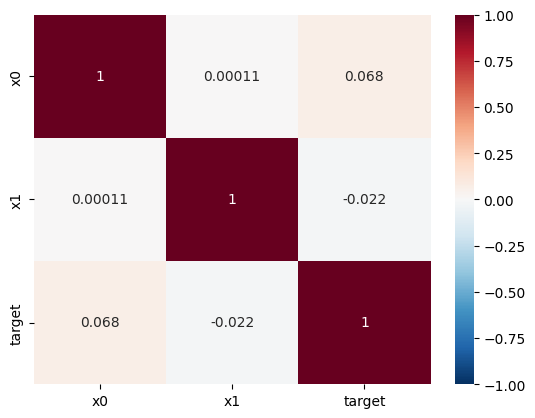

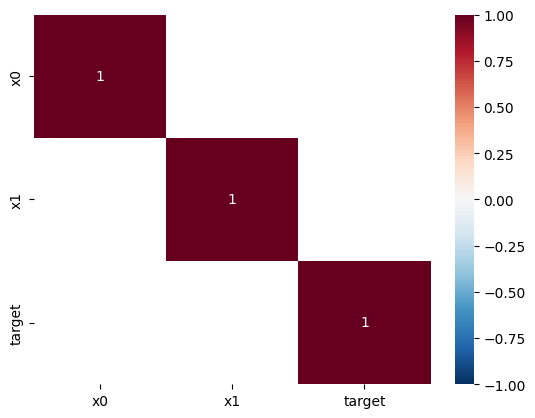

In [10]:
correlation_df = df.corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
plt.figure()
sns.heatmap(correlation_df[np.abs(correlation_df) > 0.75], vmin=-1, vmax=1, annot=True, cmap="RdBu_r");

По виду матрицы нельзя сказать о наличии корреляций между параметрами.

### Разбиение данных на выборки

Для обучения модели требуется набор данных. Пускай он каким-то образом материализовался у нас. Как убедиться, что полученная модель после обучения является качественной? Как измерить уровень качества обученной модели.

Для этого набор данных разделяется на тренировочную и тестовую выборки (и еще более редко на третью выборку — валидационную).

Для разделения на выборки можно написать свои функции. НО давайте воспользуемся уже готовой функцией `train_test_split` из подмодуля `sklearn.model_selection`.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Мы зафиксировали процесс разделения набора данных на тренировочную и тестовую выборки с помощью параметра `random_state` (в некотором понимании аналог `seed` из подмодуля `numpy.random`).

**Упражнение 1**. Изобразите на двумерной плоскости тренировочную и тестовую выборки (с помощью разных цветов) и не забудьте отметить принадлежность точки к определенному классу (с помощью разной формы `facecolor="None"`).

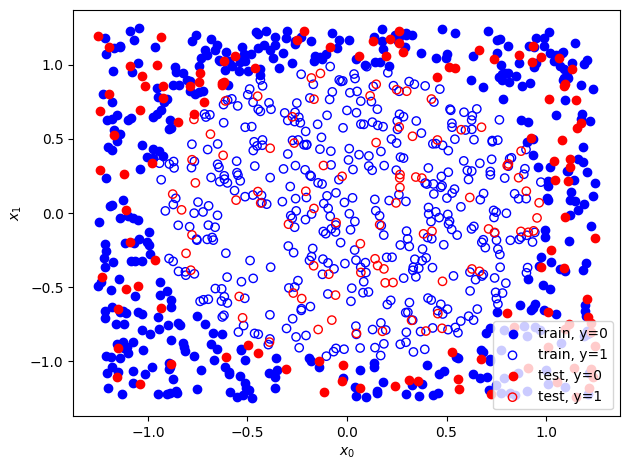

In [12]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='train, y=0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], edgecolor='blue', facecolor='None', label='train, y=1')

plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='red', label='test, y=0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], edgecolor='red', facecolor='None', label='test, y=1')

plt.legend()
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Теперь же обратися к классу `KNeighborsClassifier` из `sklearn.neighbors`. Он реализует метод kNN.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

У модели есть параметр `n_neighbors`. Он отвечает за количество соседей, которые используется при оценке параметра.

Еще интересным параметром является `metric`. Он определяет каким образом вычисляется расстояние между точками. Приведем несколько определений для метрики расстояния:
- `euclidean` $$ \rho(x, y) = \sqrt{\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^2}$$
- `manhattan` $$ \rho(x, y) = \sum\limits_{i = 1}^{N}|x_i - y_i|$$
- `minkowski` $$ \rho(x, y) = \left(\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^p\right)^{1 / p}, p \in (0, 1)$$

Попробуем обучить нашу модель.

In [14]:
model_knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(metric='euclidean')

Теперь можно предсказать значение целевого параметра на тренировочной выборке данных.

In [15]:
y_pred = model_knn.predict(X_test)

### Метрики качества обучения модели

Определим качество работы нашей модели. Это можно сделать с помощью `confusion_matrix` и `accuracy_score`.
- `confusion_matrix` возвращает матрицу несоотвествия (матрицу ошибок); значение в $ij$-элементе соотвествует количеству элементов, которые пренадлежат группе $i$ и были отмечены как элементы группы $j$. Для случая бинарной классификации:
$$\begin{pmatrix} \text{True positive}\ (\mathrm{TP}) & \text{False positive}\ \mathrm{(FP)} \\ \text{False negative}\ \mathrm{(FN)} & \text{True negative}\ (\mathrm{TN}) \\ \end{pmatrix}$$
- `accuracy_score` соотвествует доле правильно предсказаных меток $$ \text{accuracy score} = \dfrac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}} $$

Картинка ниже визуализирует смысл матрицы несоответствия.

![image]( 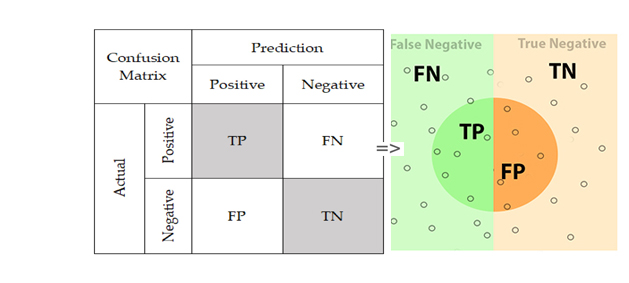)

Дадим несколько интерпретаций для выше указанных TP, TN, FP, FN.

- $\rm True\ Positive$:
  - Была **правильно** определена **принадлежность** рассматриваемого объекта к нулевому классу;
  - Была **принята** основная (нулевая) гипотеза ($H_0$), при условии ее **верности**.
- $\rm True\ Negative$:
  - Была **правильно** определена **не принадлежность** рассматриваемого объекта к нулевому классу;
  - Была **отклонена** основная (нулевая) гипотеза ($H_0$), при условии ее **ложности**.
- $\rm False\ Positive$:
  - Была определена **принадлежность** рассматриваемого объекта к нулевому классу, хотя объект **не относится** к нему;
  - Была **отклонена** основная (нулевая) гипотеза ($H_0$), при условии ее **верности**.
- $\rm False\ Negative$:
  - Была определена **не принадлежность** рассматриваемого объекта к нулевому классу, хотя объект **относится** к нулевому классу;
  - Была **принята** основная (нулевая) гипотеза ($H_0$), при условии ее **ложности**.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 0.97
Confussion matrix of kNN:
 [[110   4]
 [  2  84]]


Дополнительно вводятся метрики качества `precision` и `recall`
- `precision` доля релевантных объектов среди извлеченных
$$ \mathrm{precision} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}} $$
- `recall` доля релевантных объектов, которые были извлечены
$$ \mathrm{recall} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}} $$

**Упражнение 2**. Вычислите `precision` и `recall` для вышеопределенной модели.

In [17]:
from sklearn.metrics import precision_score, recall_score

print("Precision: {}".format(round(precision_score(y_true=y_test, y_pred=y_pred), 4)))
print("Recalln: {}".format(round(recall_score(y_true=y_test, y_pred=y_pred), 4)))

Precision: 0.9545
Recalln: 0.9767


Попробуем построить зависимость частоты TP от FP.

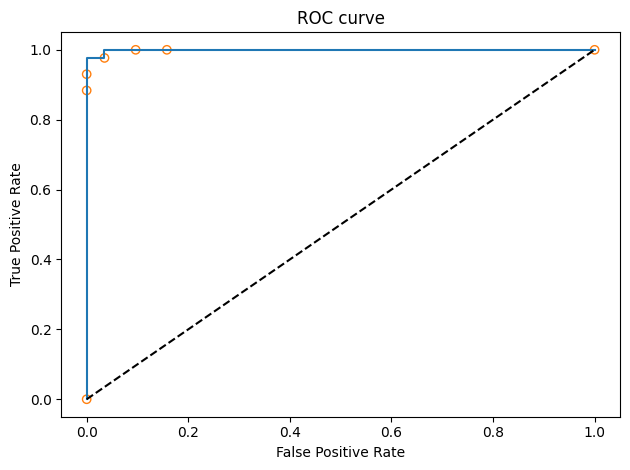

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_true=y_test, y_score=model_knn.predict_proba(X_test)[:, 1])

plt.scatter(fpr, tpr, facecolors="none", edgecolors="C1")
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.tight_layout()

Мы получили очень хорошее значение точности для нашей модели. Можем ли мы получить больше? Конечно, ~~если откинем метод kNN и просто начертим окружность радиуса 1~~!

### Оптимизация параметров модели kNN

Давайте попробуем оптимизировать количество соседей.

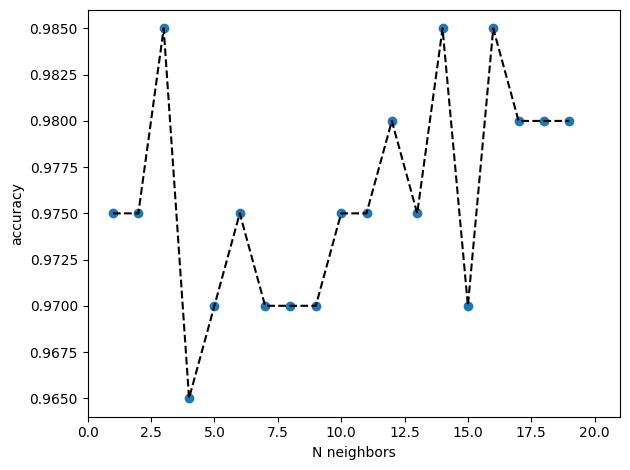

In [19]:
accuracies_knn = []
for n_neighbors in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    model_knn.fit(X_train, y_train)

    accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))

plt.plot(range(1, 20), accuracies_knn, linestyle="--", color="black")
plt.scatter(range(1, 20), accuracies_knn)
plt.xlim((0, 21))
plt.xlabel("N neighbors")
plt.ylabel("accuracy")
plt.tight_layout()

По графику можно сказать: 3 соседа является оптимальным выбором.

**Упражнение 2**. Попробуйте найти оптимальный выбор параметра `metric` для класса `KNeighborsClassifier` в данной задаче при фиксированном значении `n_neighbors=3`.

In [20]:
metrics = [
    'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine', 'correlation',
    'haversine', 'sqeuclidean', 'canberra', 'nan_euclidean'
]

accuracies_knn = []
for metr in metrics:
    model_knn = KNeighborsClassifier(n_neighbors=3, metric=metr)
    model_knn.fit(X_train, y_train)

    accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))

dddf = pd.DataFrame({
    'Metric': metrics,
    'Accuracy': accuracies_knn
})

dddf

,Metric,Accuracy
0,euclidean,0.985
1,manhattan,0.985
2,chebyshev,0.985
3,minkowski,0.985
4,cosine,0.525
5,correlation,0.500
6,haversine,0.980
7,sqeuclidean,0.985
8,canberra,0.950
9,nan_euclidean,0.985


In [21]:
dddf[dddf['Accuracy'] == dddf['Accuracy'].max()]

,Metric,Accuracy
0,euclidean,0.985
1,manhattan,0.985
2,chebyshev,0.985
3,minkowski,0.985
7,sqeuclidean,0.985
9,nan_euclidean,0.985


### Преобразование данных, альтернативное решение

С двумя координатами работать привычно, но задача обладает симметрией.

Попробуем построить альтернативное решение с использованием информации о расстоянии от центра координат до соответствующей точки.

In [22]:
df["r"] = df["x0"]**2 + df["x1"]**2

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
model_knn.fit(X=X_train, y=y_train)
y_pred = model_knn.predict(X_test)

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 1.0
Confussion matrix of kNN:
 [[114   0]
 [  0  86]]


Получили идеальный классификатор. Но всегда ли он будет таким идеальным? Можем это проверить с помощью механизма кросс-валидации

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()

model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring="accuracy",
    cv=kf,
)

print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}")

Test accuracy are [0.99  1.    1.    1.    0.995]
Mean accuracy = 0.9970000000000001


**Упражнение 3**. Проведите кросс-валидацию для модели kNN, которая обучается на паре параметров $x_0$ и $x_1$. Сравните результат с предыдущей моделью, которая обучается на одном параметре.

In [24]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = df[['x0', 'x1']].values
y = df["target"].to_numpy()

model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring="accuracy",
    cv=kf,
)

print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}")

Test accuracy are [0.995 0.955 0.985 0.98  0.985]
Mean accuracy = 0.9800000000000001


### Искусственный набор данных

Если с примером про окружность все понятно, то можно приступить к набору данных с большим количеством признаков. Сгенерируем такие псевдоданные с помощью `make_classification`.

In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_classes=2,
    n_repeated=1,
    n_redundant=1,
    random_state=2,
)

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "x2", "x3", "x4", "x5", "target"])

df.head()

,x0,x1,x2,x3,x4,x5,target
0,-0.070035,1.006728,1.992567,1.545391,1.992567,0.843520,0.0
1,0.883467,0.714652,1.215424,0.795972,1.215424,-0.406246,1.0
2,0.506578,-0.445396,-0.982998,0.837789,-0.982998,0.710466,1.0
3,-1.039690,-0.646307,-1.047843,-1.045372,-1.047843,0.189569,0.0
4,-0.265684,0.814057,1.655815,1.495793,1.655815,-0.307948,0.0


Построим распределение признаков и корреляционную матрицу.

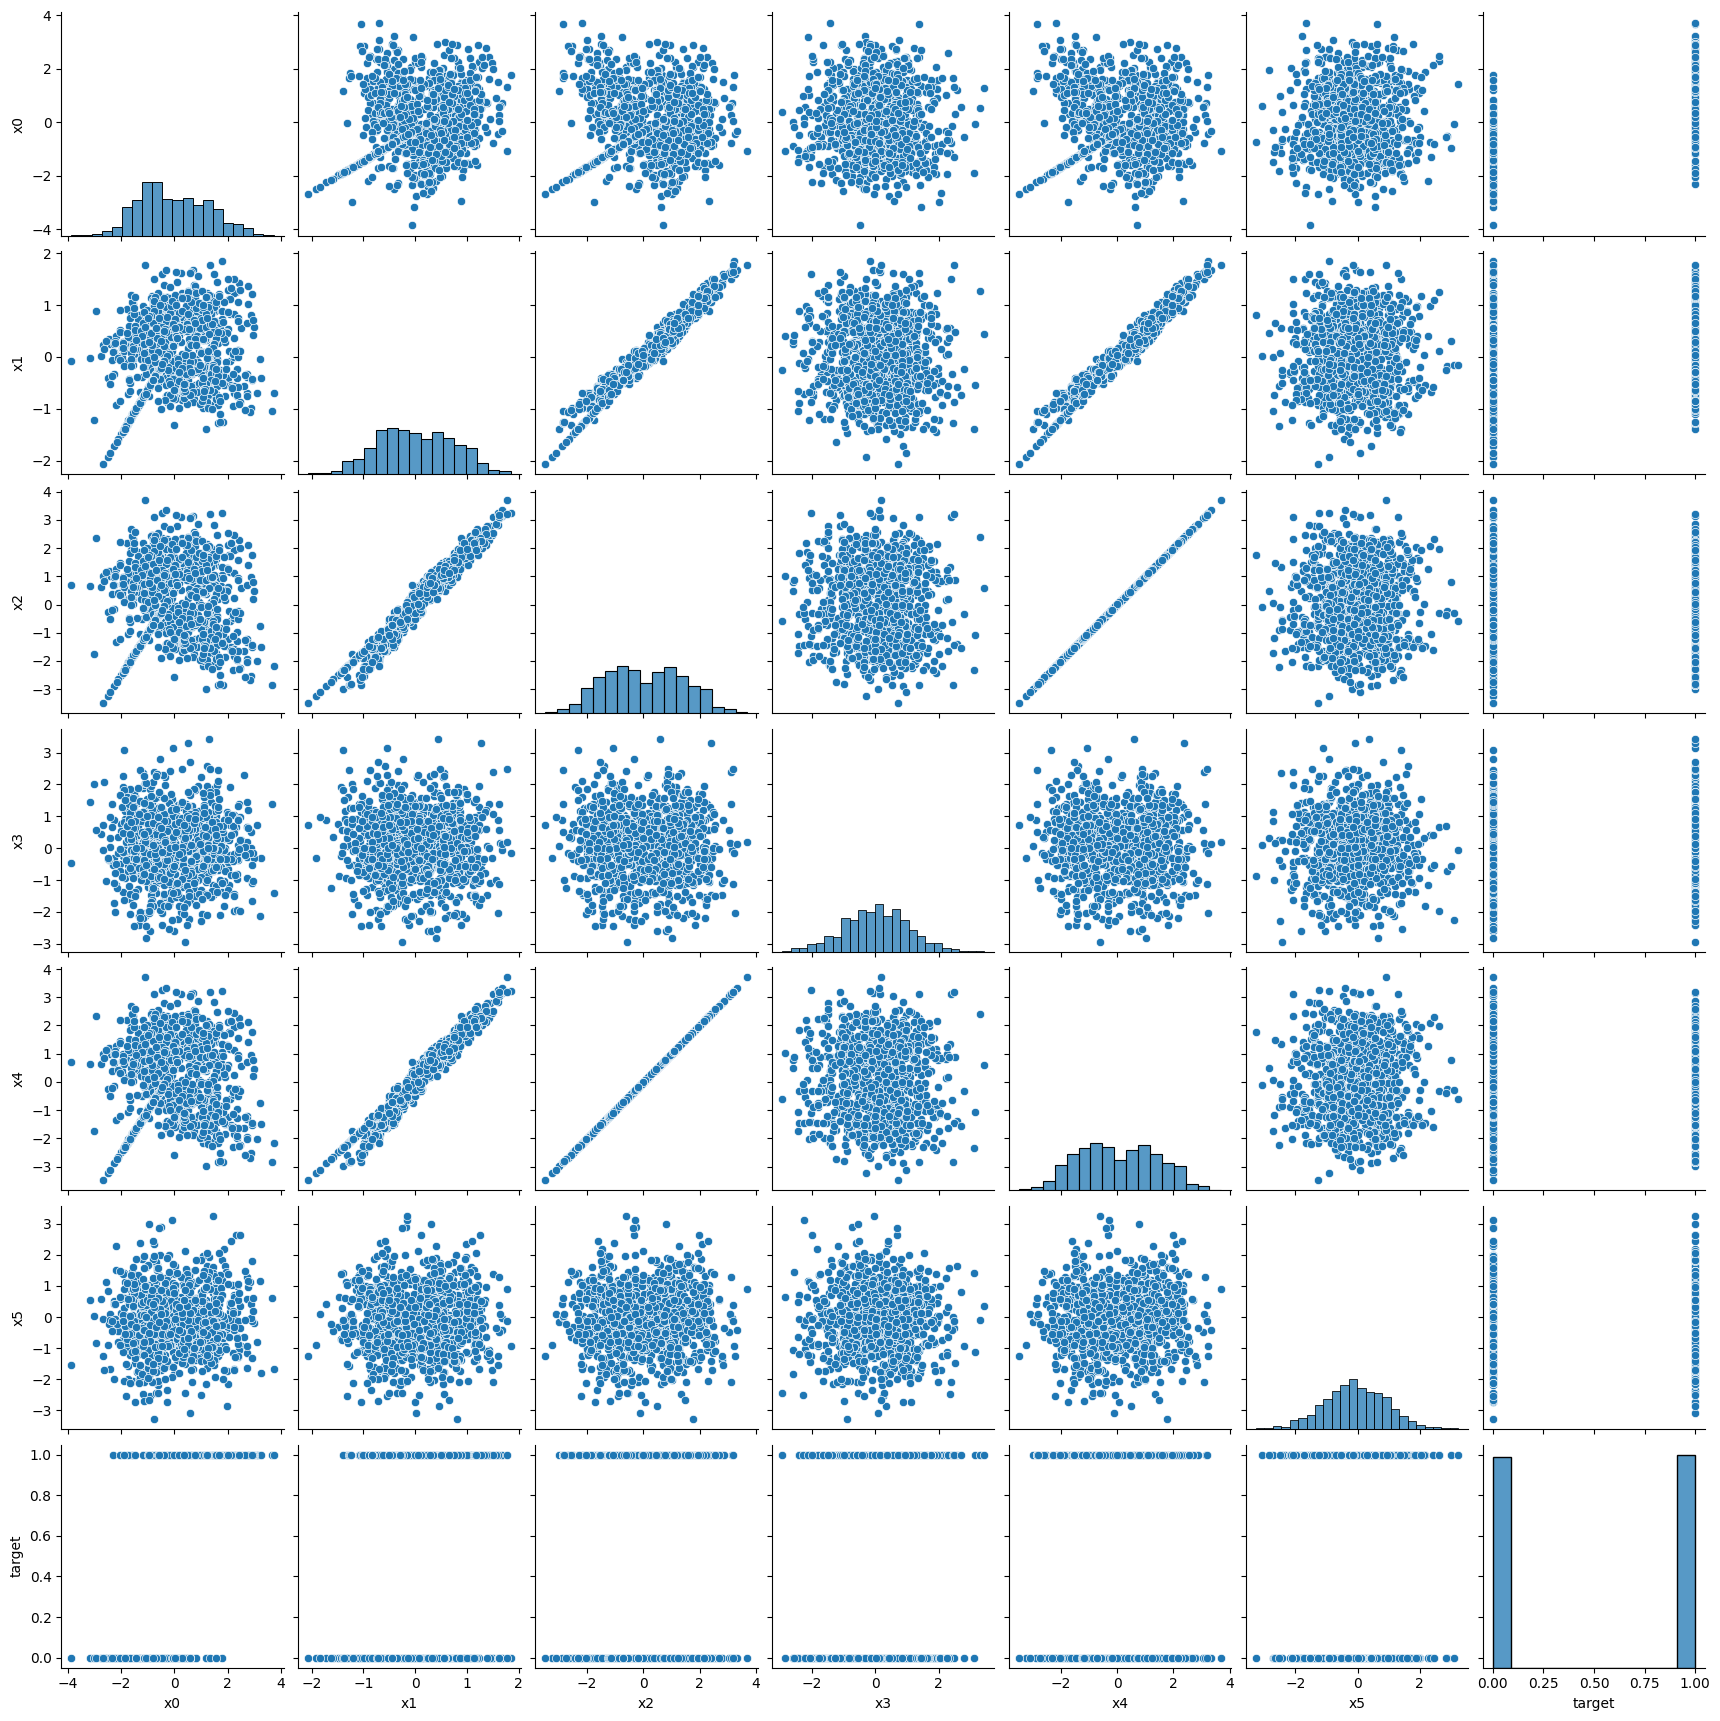

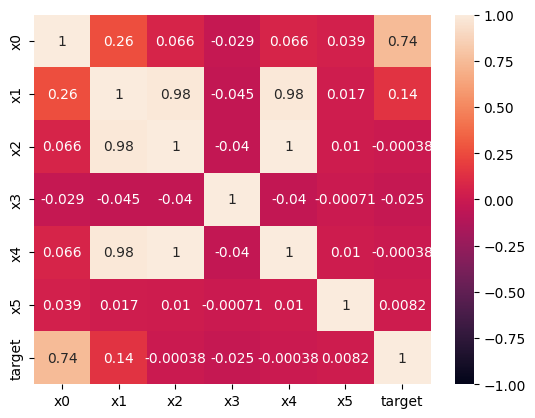

In [27]:
sns.pairplot(df)

correlation_df = df.corr()
plt.figure()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

По виду корреляционной матрицы можно сказать, что часть признаков сильно корррелирует (или антикоррелирует) между собой.

Это поведение вполне очевидно, ведь для создания данных мы указали:
- `n_repeated=1` часть признаков повторяется;
- `n_redundant=1` часть признаков является избыточной для описания данных.

Избыточные признаки откидывают из анализа, корреляции между признаками стараются избегать. Их можно откинуть или же регуляризировать (об этом позже).

## Задания

**Задание 1**. Попробуйте создать модель классификации методом kNN и обучить ее с коррелированными данными и без. Попробуйте проанализировать влияние коррелированных признаков на качество модели.

Text(0, 0.5, 'Accuracy')

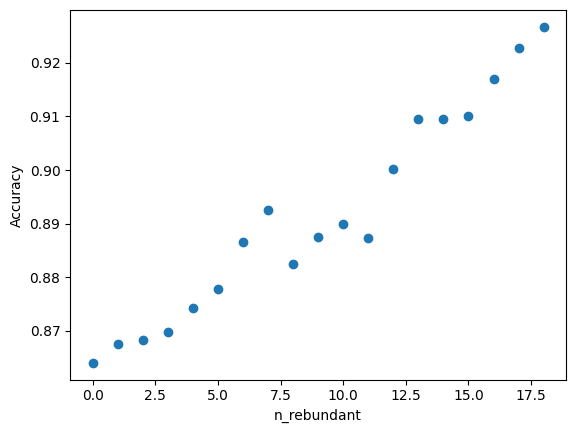

In [30]:
N = 20
arr1, arr2 = [], []

for i in range(0, N - 1):
    X, y = make_classification(
        n_samples=20000,
        n_features=N,
        n_classes=2,
        n_repeated=0,
        n_redundant=i,
        random_state=2,
    )

    df = pd.DataFrame(np.vstack((X.T, y)).T)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    model_knn.fit(X_train, y_train)

    arr1.append(i)
    arr2.append(accuracy_score(model_knn.predict(X_test), y_test))

plt.scatter(arr1, arr2)
plt.xlabel("n_rebundant")
plt.ylabel("Accuracy")

Для улучшения обучения модели иногда приходится нормализовать признаки. Под этим имеют в виду процедуру приведения признаков к нормальному распределению
- Для каждого признака вычисляется среднее и вычитается из всех признаков одновременно
- После смещения признаки масшатабируются делением на разность максимального-минимального значения

Эту процедуру уже реализует класс `Normalizer`, но частично эту процедуру можно провести с помощью `MinMaxScaler`.

**Задание 2**. Реализуйте два различных подхода к препроцессингу признаков и обучите модель kNN снова. Как это отразиться использование трансформированных признаков на качестве модели?

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

X, y = make_classification(
        n_samples=30000,
        n_features=10,
        n_classes=2,
        n_repeated=0,
        n_redundant=0,
        random_state=2,
    )

In [73]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

df = pd.DataFrame(np.vstack((scaled_X.T, y)).T)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
model_knn.fit(X_train, y_train)

print(accuracy_score(model_knn.predict(X_test), y_test))

0.9361666666666667


In [74]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

df = pd.DataFrame(np.vstack((scaled_X.T, y)).T)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
model_knn.fit(X_train, y_train)

print(accuracy_score(model_knn.predict(X_test), y_test))

0.9325


In [77]:
scaler = Normalizer()
scaled_X = scaler.fit_transform(X)

df = pd.DataFrame(np.vstack((scaled_X.T, y)).T)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
model_knn.fit(X_train, y_train)

print(accuracy_score(model_knn.predict(X_test), y_test))

0.9326666666666666


In [75]:
print("Примерно без разницы")

Примерно без разницы


Перейдем к еще одному методу решения проблемы классификации

**Задание 3**. В качестве задачи на классификацию возьмем классический набор данных Титаника. Вам предоставляется информация о пассажирах затонувшего лайнера. Попробуйте определить влияние параметров на целевую метрику "survived".
- Определите наиболее влияющие параметры
- Воспользуйтесь алгоритмом дерева решений
- Заставьте дерево переобучиться
- Решите задачу методом kNN

In [94]:
df = sns.load_dataset("titanic")

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Задание 4**. Проведите анализ набора данных `breast cancer`. Обучите модели kNN. Проанализируйте влияние признаков на качество моделей.

In [ ]:
from sklearn.datasets import load_breast_cancer
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from pandas import DataFrame

dataset = load_breast_cancer(as_frame=True)
df: DataFrame = dataset.frame

print(dataset.DESCR)

df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Дополнительные материалы

Ниже содержится информация о деревьях решений. Это популярный алгоритм классификации данных. Предлагается читателю ознакомится с этим алгоритмом в качестве факультатива.

## Дерево решений

В программировании есть понятие дерева. Это структура, которая состоит из узлов. У узла может быть родитель и наследники. Если у узла нет родителя, то этот узел является корневым. Если у узла нет наследников, то этот узел является листом.

Среди деревьев выбеляют класс бинарных деревьев. Узлы таких деревьев содержат максимум двух наследников

В каждом узле дерева можно разместить условие на какой-нибудь признак. По проверке первого условия решается куда далее "направлять" признаки. Процесс длится до момента спуска в определенный лист. И уже по листу решается принадлежность набора признаков определенному классу.

![image]( 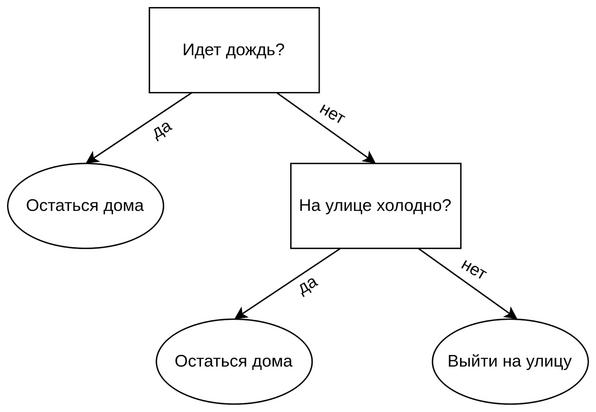)

Деревья могут использоваться и в задаче регрессии. В таком случае они подгоняют искомую зависимость кусочно-константной функцией.

![image]( 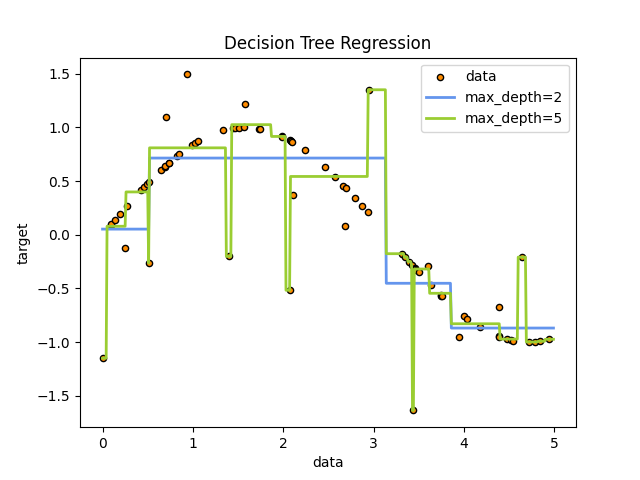)

Вся работа с деревьями содержиться в подмодуле `tree`.

### Набор данных ирисы

Попробуем воспользоваться деревом решений для классификации объектов. В качестве данных возьмем `iris`:
- `sepal_length`: длина чашелистика;
- `sepal_width`: ширина чашелистика;
- `petal_length`: длина лепестка;
- `petal_width`: ширина лепестка;
- `species`: вид ириса.

In [ ]:
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Отдельно выдилим названия признаков и целевого параметра.

In [ ]:
feature_names = df.columns[:-1]
target_name = df.columns[-1]

Посмотрим на совместное распределение признаков.

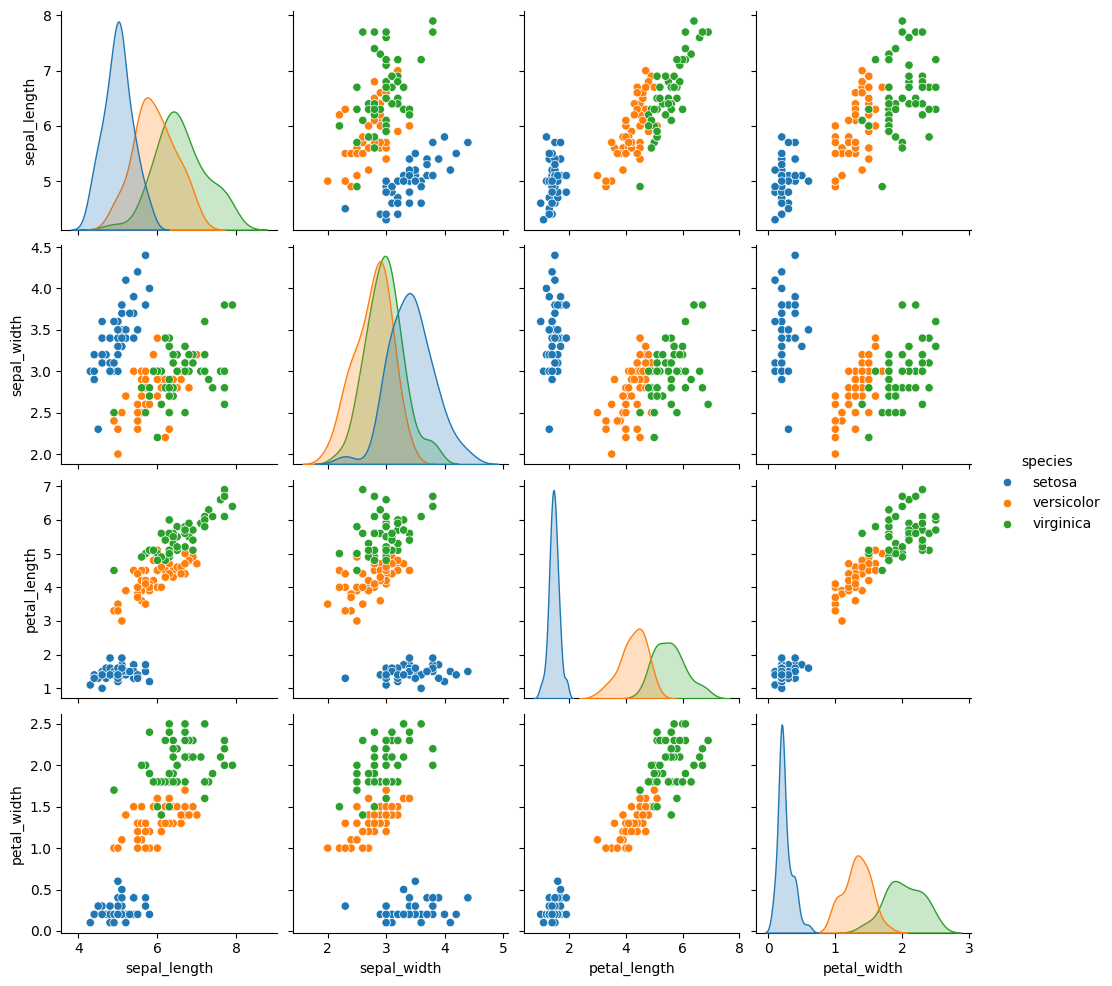

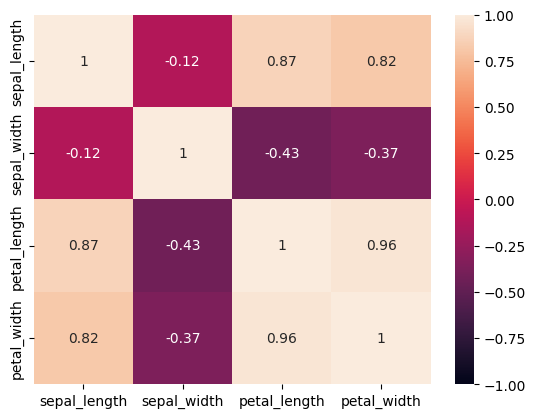

In [ ]:
sns.pairplot(df, hue="species")

plt.figure()
correlation_df = df[feature_names].corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

Теперь мы готовы к построению модели.

In [ ]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()

X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Оценим качество модели.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_true=y_test, y_pred=model_tree.predict(X_test)))

confusion_matrix(y_test, model_tree.predict(X_test))

0.9666666666666667


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Дерево решений показывает отличный результат.

### Визуализация дерева решений

Давайте посмотрим на внутренность дерева. Дерево решений можно визуализировать в текстовом формате.

In [ ]:
print(tree.export_text(model_tree))

|--- feature_2 <= 2.60
|   |--- class: setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



Деревья решений можно визуализировать в графическом формате.

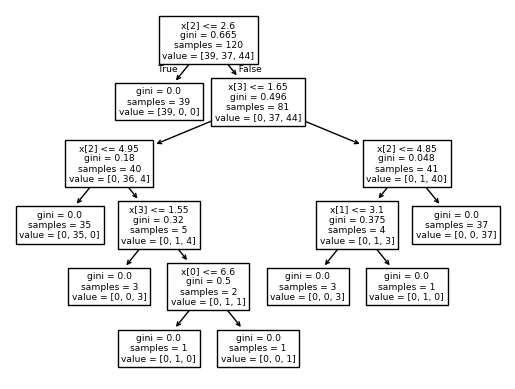

In [ ]:
tree.plot_tree(model_tree);

Деревья решений легко переобучить. Например, если задать их слишком "глубокими".

In [ ]:
model_tree = tree.DecisionTreeClassifier(max_features=1)
model_tree.fit(X_train, y_train)

accuracy_score(y_test, model_tree.predict(X_test)), confusion_matrix(y_test, model_tree.predict(X_test))

(0.9666666666666667,
 array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]]))

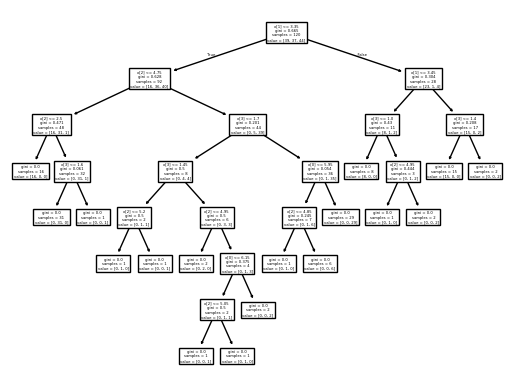

In [ ]:
tree.plot_tree(model_tree);

Глубоким деревьям не доверяют. Они имеют потенциал к переобучению. Классическая глубина дерева решения составляет от 3 до 5 узлов.